In [1]:
import numpy as np 
import os 
import glob 
import cv2
import matplotlib. pyplot as plt
import numpy as np

import insightface
from insightface.app import FaceAnalysis
import cv2

In [2]:
print('insightface:', insightface.__version__)  # Prints InsightFace version
print('numpy:', np.__version__)  # Prints NumPy version

insightface: 0.7.3
numpy: 2.0.2


Detecting Faces

In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/ankeshkumar/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/ankeshkumar/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/ankeshkumar/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/ankeshkumar/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/ankeshkumar/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None

In [4]:
swapper = insightface.model_zoo.get_model ('inswapper_128.onnx',
download=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


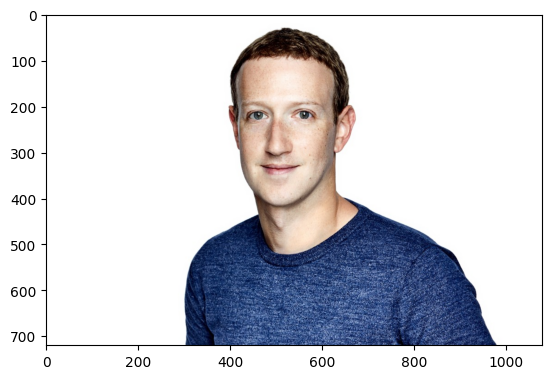

In [5]:
zuck = cv2.imread('mark_zuck.jpeg')
plt.imshow(zuck[:,:,::-1])
plt.show()

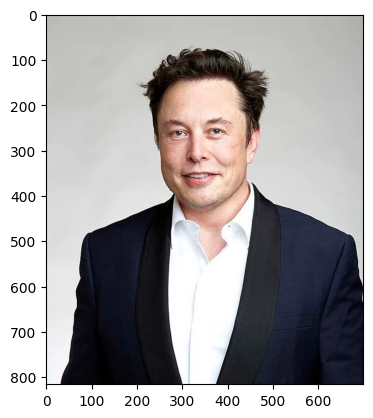

In [6]:
elon = cv2.imread('elon_musk.webp')
plt.imshow(elon[:,:,::-1])
plt.show()

# Elon -> Zuck

In [7]:
zuck = app.get(zuck)
faces = app.get(elon)
zuck = zuck[0]

res = elon.copy()

for face in faces:
    res = swapper.get(res, face, zuck, paste_back=True)

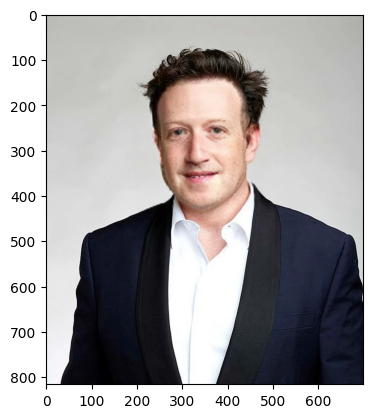

In [8]:
plt.imshow(res[:,:,::-1])
plt.show()

# Zuck -> Elon

In [9]:
zuck = cv2.imread('mark_zuck.jpeg')
faces = app.get(zuck)
elon = app.get(elon)
elon = elon[0]

res = zuck.copy()

for face in faces:
    res = swapper.get(res, face, elon, paste_back=True)

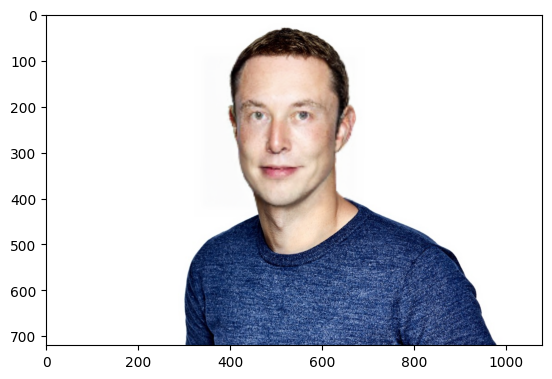

In [10]:
plt.imshow(res[:,:,::-1])
plt.show()

In [16]:
zuck

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]